<a href="https://colab.research.google.com/github/Muriloviskexe/Python/blob/main/Regress%C3%A3o_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

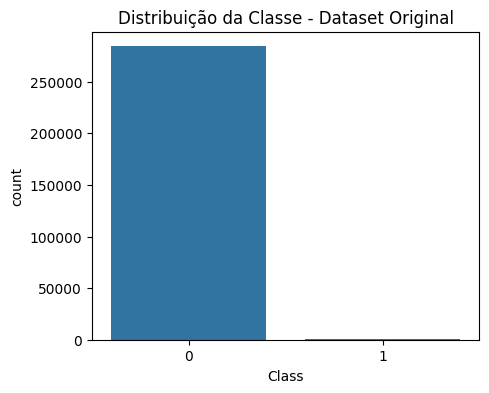

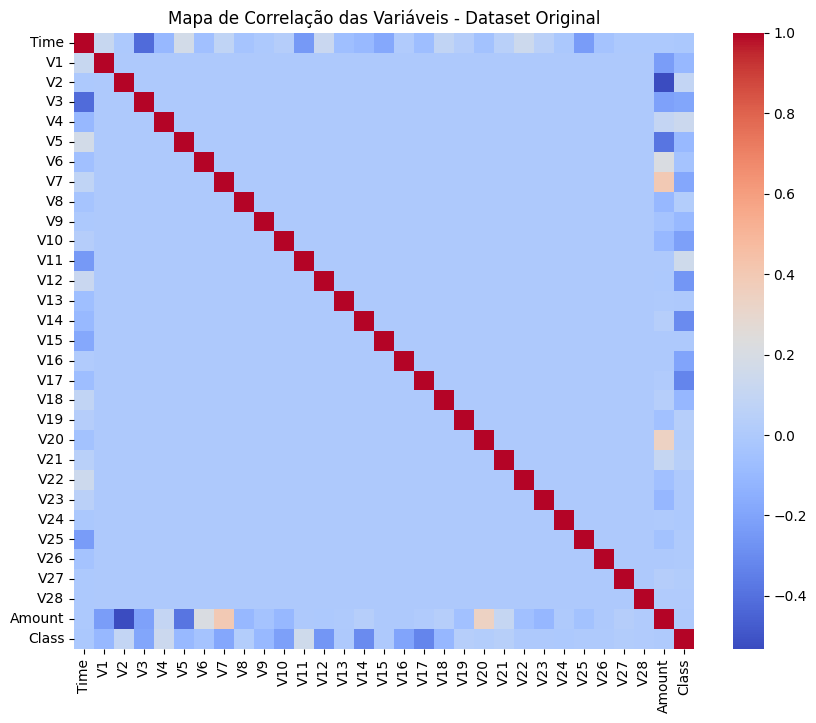

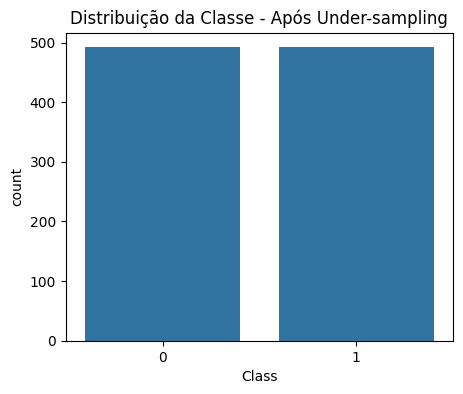

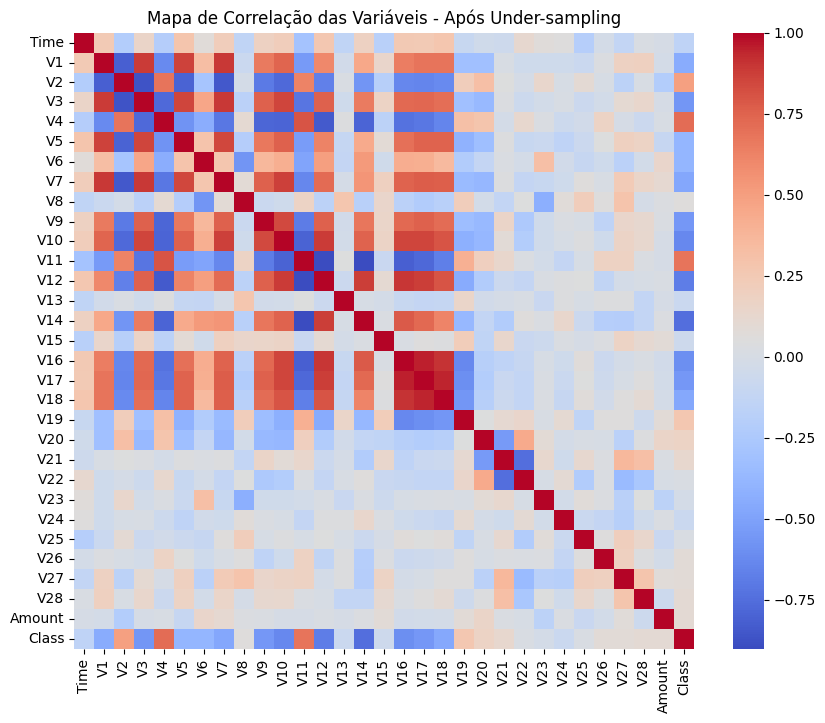


Métricas para Under-sampling
Matriz de Confusão:
[[145   5]
 [ 15 131]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


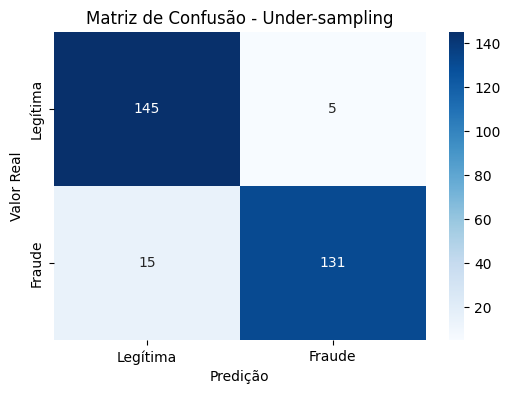

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

AUC-ROC: 0.9696803652968037


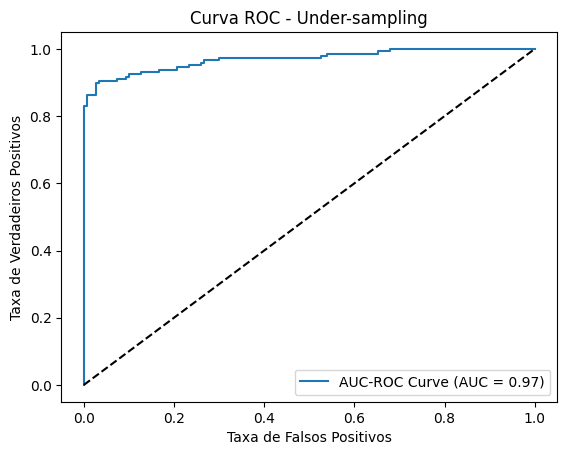

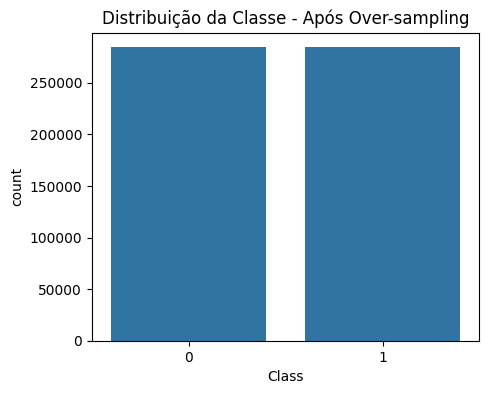

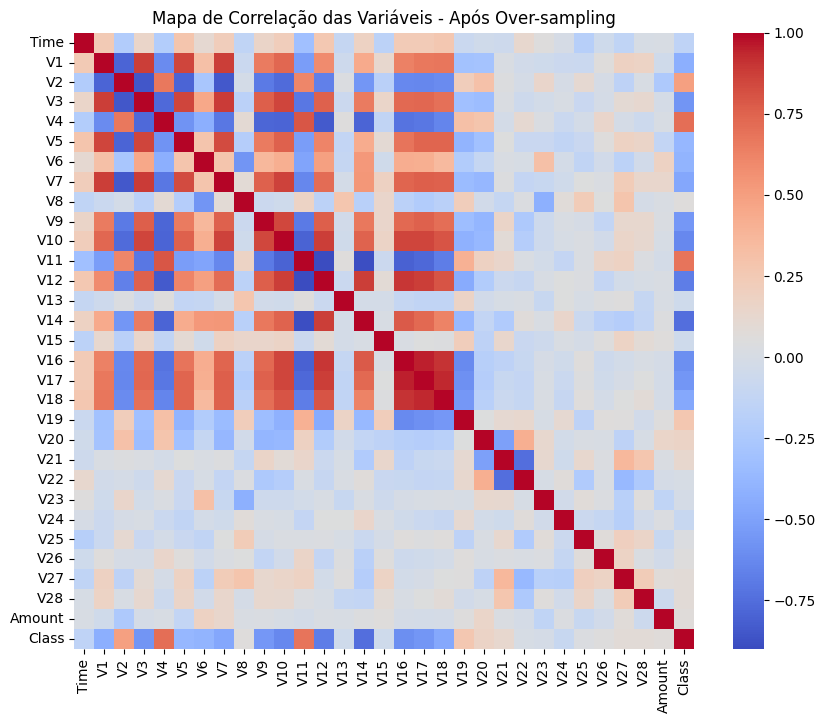

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para Over-sampling
Matriz de Confusão:
[[82168  2981]
 [ 6178 79262]]


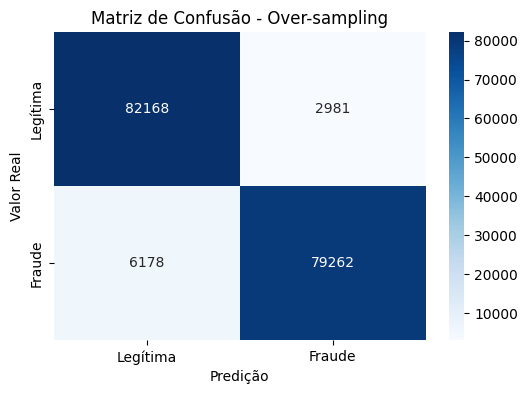

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     85149
           1       0.96      0.93      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

AUC-ROC: 0.9825577473897594


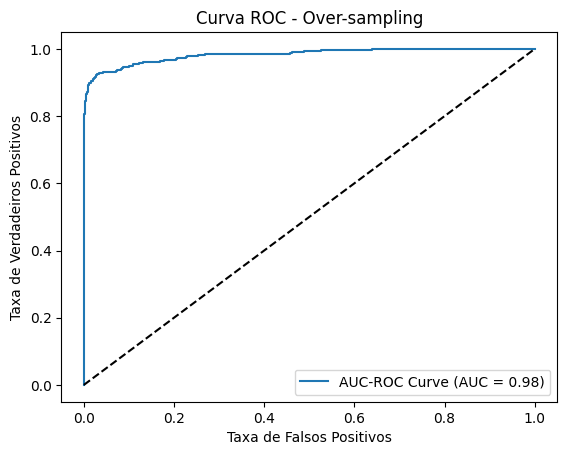

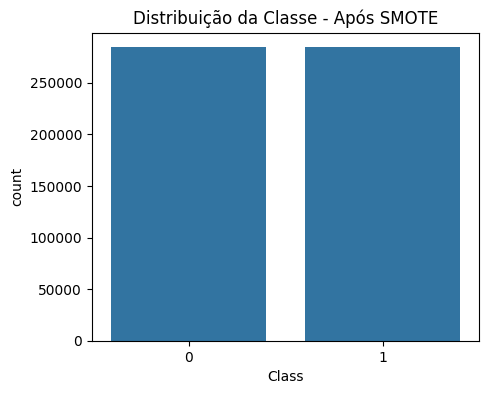

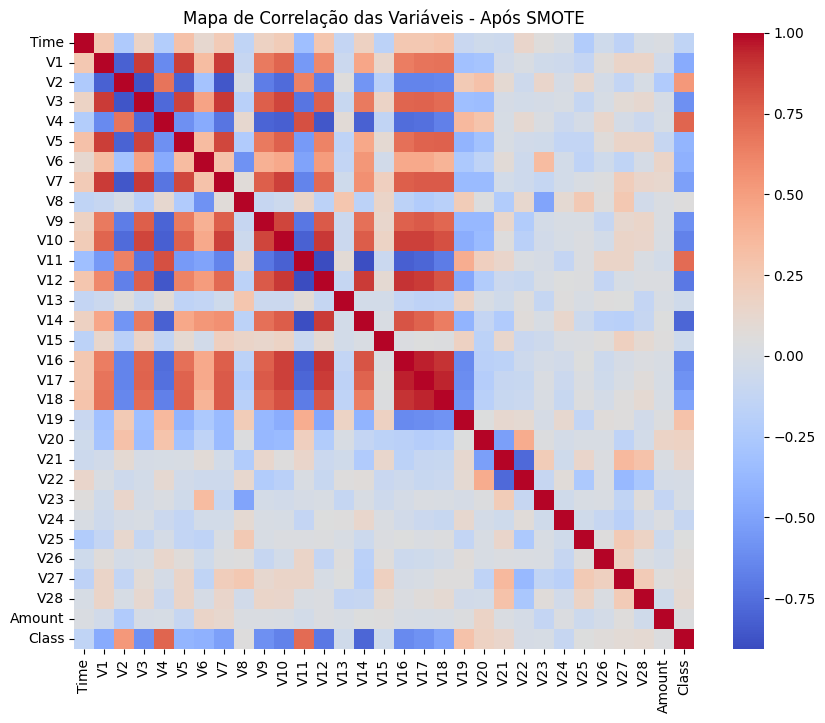

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Métricas para SMOTE
Matriz de Confusão:
[[83670  1479]
 [ 3284 82156]]


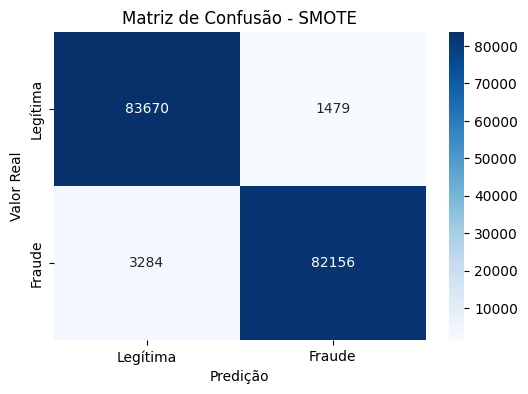

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

AUC-ROC: 0.9935997493631235


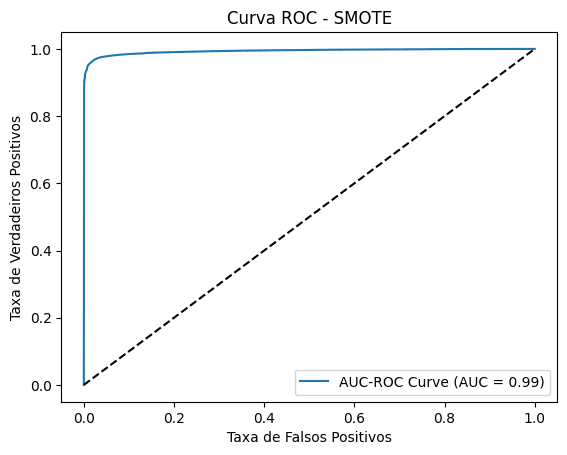


Resultados Comparativos de Balanceamento:
Under-sampling: AUC-ROC = 0.9697, F1-score Minor Class = 0.9291
Over-sampling: AUC-ROC = 0.9826, F1-score Minor Class = 0.9454
SMOTE: AUC-ROC = 0.9936, F1-score Minor Class = 0.9718

Melhor método de balanceamento: SMOTE com AUC-ROC = 0.9936 e F1-score Minor Class = 0.9718


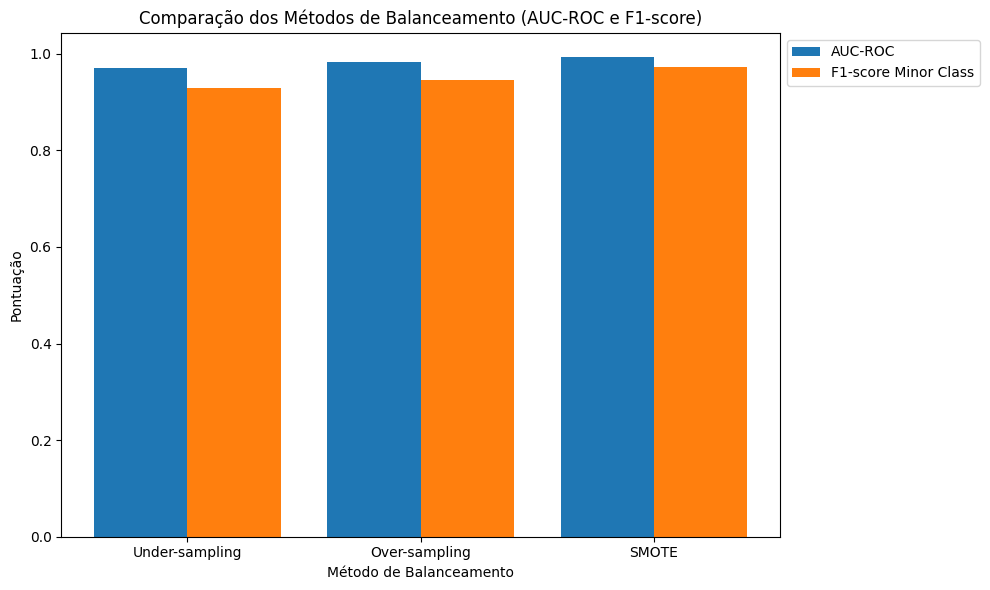

In [ ]:
# Função para visualização de distribuição de classes e correlação
def plot_class_distribution_and_correlation(data, title):
    plt.figure(figsize=(5, 4))
    sns.countplot(x='Class', data=data)
    plt.title(f'Distribuição da Classe - {title}')
    plt.show()

    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, cmap="coolwarm", annot=False, fmt='.2f')
    plt.title(f"Mapa de Correlação das Variáveis - {title}")
    plt.show()

# Função para comparar os efeitos do balanceamento e gerar um gráfico comparativo
def compare_balancing_effects(X, y):
    results = {}

    # Under-sampling
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    data_resampled_rus = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_rus['Class'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_rus, "Após Under-sampling")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Under-sampling")
    results["Under-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Over-sampling
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    data_resampled_ros = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_ros['Class'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_ros, "Após Over-sampling")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "Over-sampling")
    results["Over-sampling"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    data_resampled_smote = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_smote['Class'] = y_res  # Incluir a coluna 'Class'
    plot_class_distribution_and_correlation(data_resampled_smote, "Após SMOTE")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "SMOTE")
    results["SMOTE"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

    # Exibir resultados comparativos e identificar o melhor método
    print("\nResultados Comparativos de Balanceamento:")
    for method, metrics in results.items():
        print(f"{method}: AUC-ROC = {metrics['AUC-ROC']:.4f}, F1-score Minor Class = {metrics['F1-score Minor Class']:.4f}")

    # Identificar o método com melhor AUC-ROC e, em caso de empate, com maior F1-score da classe minoritária
    best_method = max(results, key=lambda x: (results[x]["AUC-ROC"], results[x]["F1-score Minor Class"]))
    print(f"\nMelhor método de balanceamento: {best_method} com AUC-ROC = {results[best_method]['AUC-ROC']:.4f} e F1-score Minor Class = {results[best_method]['F1-score Minor Class']:.4f}")

    # Gráfico Comparativo dos Resultados
    methods = list(results.keys())
    auc_scores = [results[method]["AUC-ROC"] for method in methods]
    f1_scores = [results[method]["F1-score Minor Class"] for method in methods]

    plt.figure(figsize=(10, 6))
    x = range(len(methods))
    plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
    plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
    plt.xticks(x, methods)
    plt.xlabel("Método de Balanceamento")
    plt.ylabel("Pontuação")
    plt.title("Comparação dos Métodos de Balanceamento (AUC-ROC e F1-score)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
    plt.tight_layout()  # Ajustar o layout para evitar cortes
    plt.show()
# Função para calcular e exibir métricas de avaliação
def evaluate_model(X, y, balance_method):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {balance_method}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítima", "Fraude"], yticklabels=["Legítima", "Fraude"])
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {balance_method}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba)
    print("AUC-ROC:", roc_auc)

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {balance_method}")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar métricas para comparação
    f1_minor_class = report["1"]["f1-score"]  # F1-score para a classe "fraude"
    return roc_auc, f1_minor_class

# Carregar dados e verificar distribuição original
data = pd.read_csv("creditcard.csv")
plot_class_distribution_and_correlation(data, "Dataset Original")

# Preparar variáveis independentes e dependentes
X = data.drop('Class', axis=1)
y = data['Class']

# Comparar os efeitos dos métodos de balanceamento
compare_balancing_effects(X, y)



